In [1]:
import numpy as np
import matplotlib.pylab as plt
import MEAutility as mu
from scipy.signal import resample_poly
from scipy.stats import kurtosis, linregress
from matplotlib import gridspec
from scipy import io
import numpy as np
import networkx as nx
from pathlib import Path
from pprint import pprint
import MEAutility as mu
import sys

#%matplotlib widget
%matplotlib notebook

from axon_velocity import *
from scipy import io

In [15]:
params = GraphAxonTracking.default_params

# change params
params['detect_threshold'] = 0.5
params["detection_type"] = "absolute"
params['kurt_threshold'] = None
params['peak_std_threshold'] = 2
params['upsample'] = 2
params['neighbor_radius'] = 50
params['mad_threshold'] = 8
params['r2_threshold'] = 0.8
params['distance_exp'] = 2


pprint(params)

{'detect_threshold': 0.5,
 'detection_type': 'absolute',
 'distance_exp': 2,
 'init_amp_peak_ratio': 0.2,
 'init_delay': 0,
 'kurt_threshold': None,
 'mad_threshold': 8,
 'max_distance_for_edge': 300,
 'max_distance_to_init': 200,
 'min_path_length': 100,
 'min_path_points': 5,
 'min_selected_points': 30,
 'n_neighbors': 3,
 'neighbor_radius': 50,
 'neighbor_selection': 'amp',
 'peak_std_distance': 30,
 'peak_std_threshold': 2,
 'r2_threshold': 0.8,
 'remove_isolated': True,
 'upsample': 2}


In [3]:
fs = 11600

In [4]:
template_folder = Path('..') / 'data' / 'real_neuron'

In [5]:
locations = io.loadmat(template_folder / 'locations.mat')['locations']

In [6]:
template_files = [t for t in template_folder.iterdir() if 'template' in t.name]
templates = []
for tempfile in template_files:
    template = io.loadmat(tempfile)['template']
    templates.append(template)

<IPython.core.display.Javascript object>


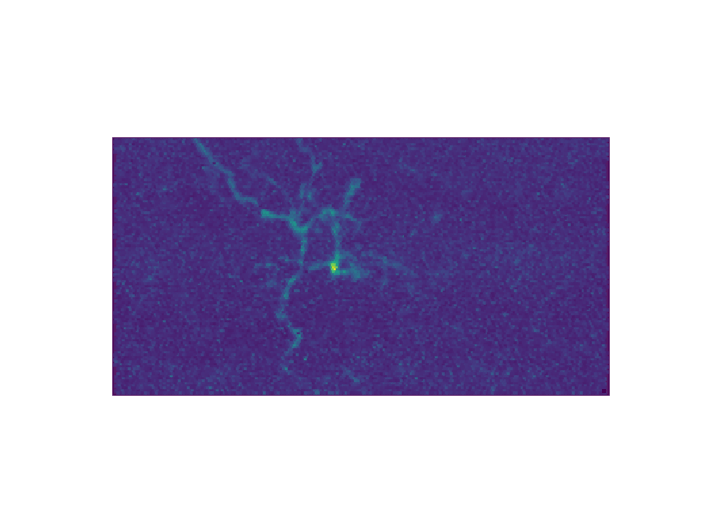

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
for template in templates:
    ax = plot_amplitude_map(template, locations, log=True)

In [29]:
gtr0 = compute_graph_propagation_velocity(templates[0], locations, 
                                          fs, debug_mode=False, verbose=True, **params)

Channel selection

Initial channels: 20736
18816 after detection filter
2167 after peak std filter
16799 after init_delay filter
Removing isolated channels
Removed 61 isolated channels
Added 891 nodes
Added 2539 edges
10 connected to init channel
No path between 19360 and init channel 11673
No path between 10736 and init channel 11673
No path between 12928 and init channel 11673
No path between 10285 and init channel 11673
Path starting at channel 11854 removed for minimum path length: 0um
No path between 10776 and init channel 11673
No path between 11129 and init channel 11673
Path starting at channel 14486 removed for minimum path length: 0um
No path between 12043 and init channel 11673
Path starting at channel 14336 removed for minimum path length: 0um
Path starting at channel 3932 removed for minimum path points: 4 points
No path between 11481 and init channel 11673
Path starting at channel 4855 removed for minimum path points: 4 points
Path starting at channel 13668 removed for mi

<IPython.core.display.Javascript object>


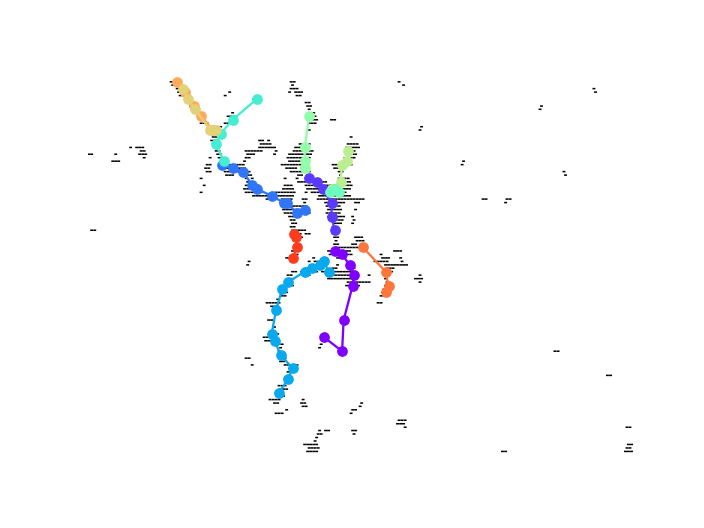

In [28]:
ax_clean = gtr0.plot_clean_branches()

<IPython.core.display.Javascript object>


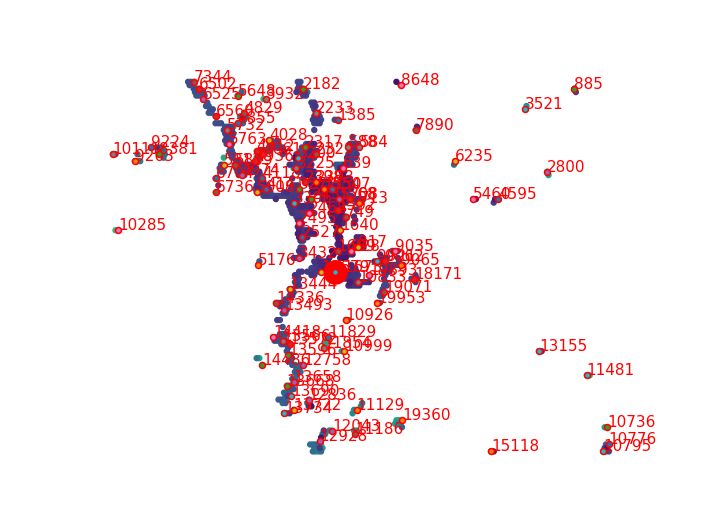

In [21]:
ax = gtr0._plot_nodes(node_searched_labels=True)

<IPython.core.display.Javascript object>


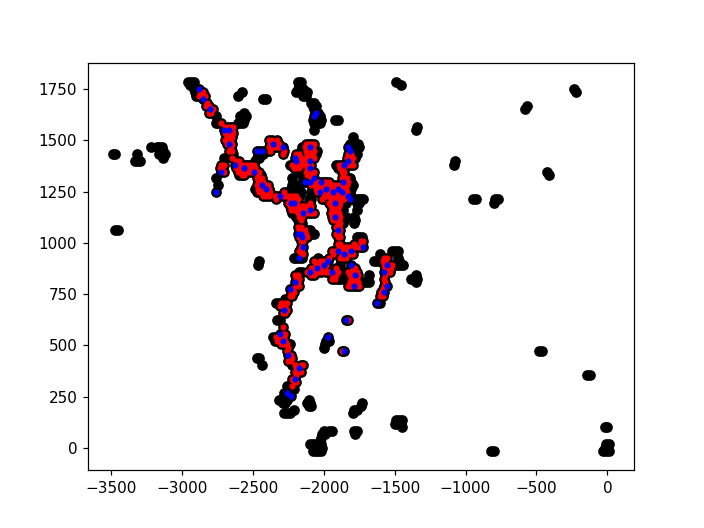

In [20]:
plt.figure()
plt.plot(gtr0.locations[gtr0.selected_channels, 0], gtr0.locations[gtr0.selected_channels, 1], 'ko')
plt.plot(gtr0.locations[gtr0._removed_neighbors, 0], gtr0.locations[gtr0._removed_neighbors, 1], 'r.')
plt.plot(gtr0.locations[gtr0._removed_path_nodes, 0], gtr0.locations[gtr0._removed_path_nodes, 1], 'b.')

<IPython.core.display.Javascript object>


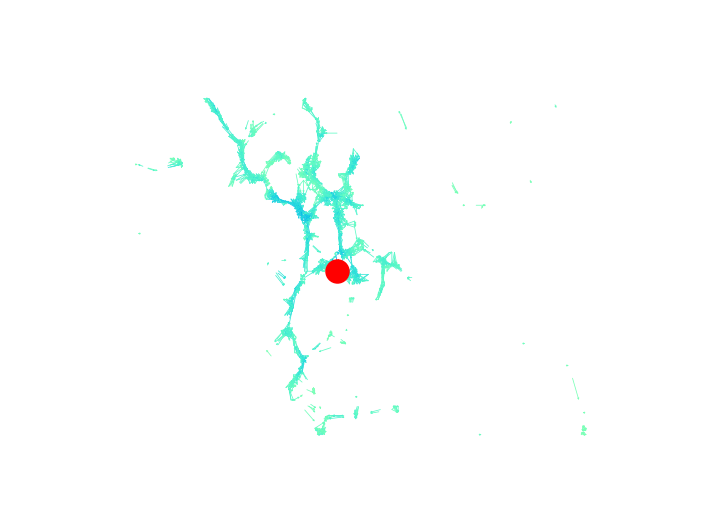

<AxesSubplot:>

In [18]:
gtr0._plot_edges()

In [22]:
gtr1 = compute_graph_propagation_velocity(templates[1], locations, 
                                         fs, debug_mode=False, verbose=True, **params)

Channel selection

Initial channels: 20736
6444 after detection filter
4087 after peak std filter
17435 after init_delay filter
Removing isolated channels
Removed 18 isolated channels
Added 2512 nodes
Added 7481 edges
12 connected to init channel
Path starting at channel 6283 removed for minimum path points: 4 points
Path starting at channel 14798 removed for minimum path length: 84.53698085383928um
Path starting at channel 12937 removed for minimum path length: 77.89736837660179um
Path starting at channel 2701 removed for minimum path length: 83.773504164503um
Path starting at channel 14433 removed for minimum path length: 76.54157918924895um
Path starting at channel 3341 removed for minimum path length: 0um
Path starting at channel 2762 removed for minimum path length: 50.59644256269407um
Path starting at channel 2990 removed for minimum path length: 76.59104518742923um
Path starting at channel 8192 removed for minimum path length: 0um
Path starting at channel 5603 removed for minimu

/Users/abuccino/anaconda3/envs/mearec/lib/python3.8/site-packages/scikit_learn-0.24.1-py3.8-macosx-10.9-x86_64.egg/sklearn/linear_model/_theil_sen.py:125: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn("Maximum number of iterations {max_iter} reached in "


<IPython.core.display.Javascript object>


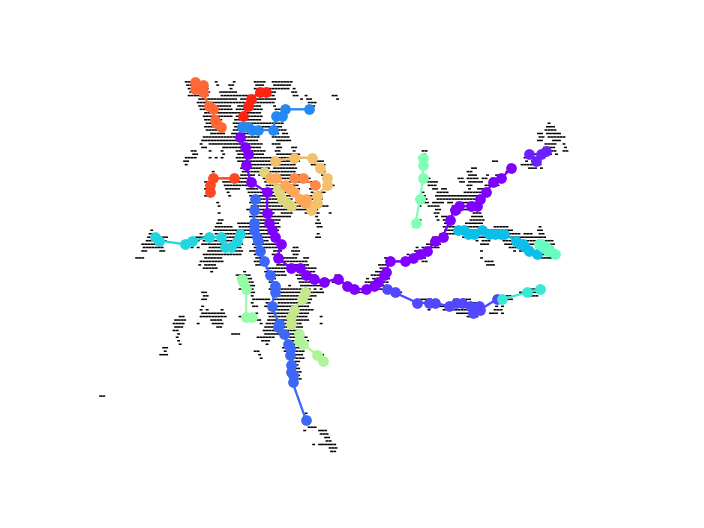

In [23]:
ax_clean = gtr1.plot_clean_branches()

<IPython.core.display.Javascript object>


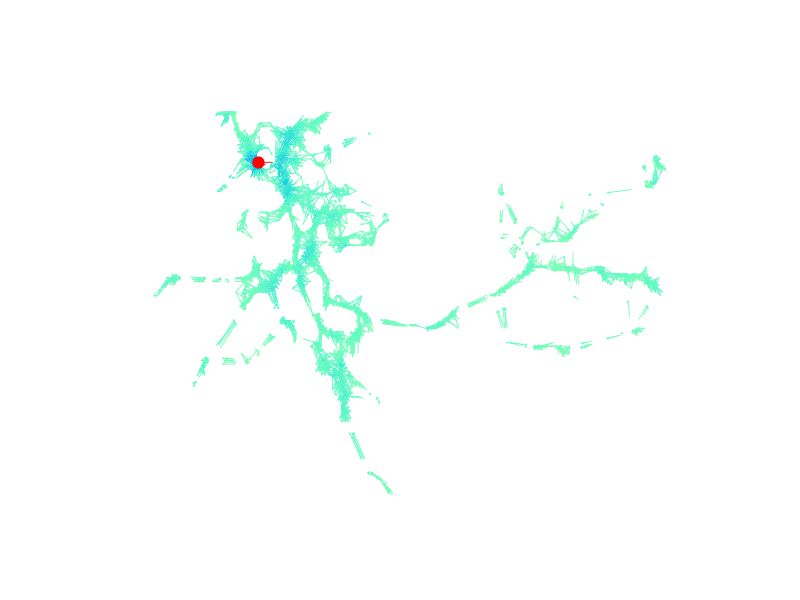

In [32]:
_ = gtr1._plot_edges()

In [24]:
gtr2 = compute_graph_propagation_velocity(templates[2], locations, 
                                          fs, debug_mode=False, verbose=True, **params)

Channel selection

Initial channels: 20736
18813 after detection filter
2532 after peak std filter
17014 after init_delay filter
Removing isolated channels
Removed 49 isolated channels
Added 1285 nodes
Added 3661 edges
17 connected to init channel
No path between 10784 and init channel 9282
No path between 5197 and init channel 9282
No path between 13821 and init channel 9282
No path between 11167 and init channel 9282
No path between 870 and init channel 9282
No path between 7195 and init channel 9282
No path between 2162 and init channel 9282
Path starting at channel 10359 removed for minimum path length: 0um
No path between 6327 and init channel 9282
Path starting at channel 9714 removed for minimum path length: 0um
No path between 5252 and init channel 9282
No path between 2723 and init channel 9282
No path between 2759 and init channel 9282
Path starting at channel 4309 removed for minimum path length: 19.72308292331602um
No path between 11958 and init channel 9282
No path between

/Users/abuccino/anaconda3/envs/mearec/lib/python3.8/site-packages/scikit_learn-0.24.1-py3.8-macosx-10.9-x86_64.egg/sklearn/linear_model/_theil_sen.py:125: ConvergenceWarning: Maximum number of iterations 300 reached in spatial median for TheilSen regressor.
  warnings.warn("Maximum number of iterations {max_iter} reached in "


<IPython.core.display.Javascript object>


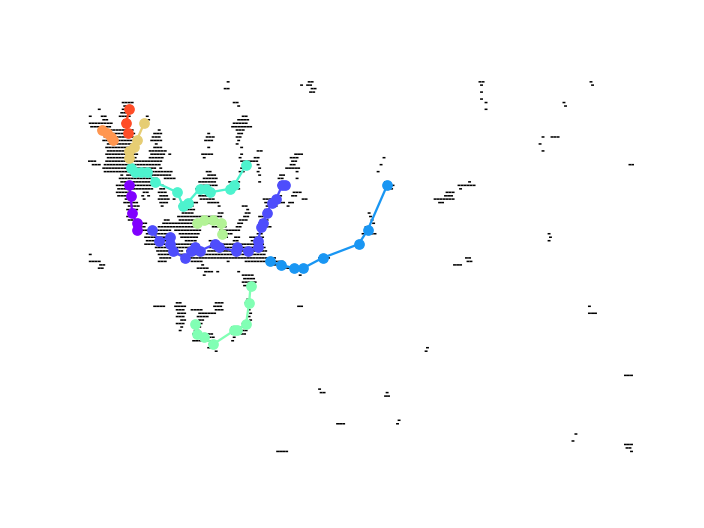

In [26]:
ax_clean = gtr2.plot_clean_branches()

In [ ]:
_ = gtr2._plot_edges()

In [ ]:
gtrs = []
templates = []
for tempfile in template_files:
    template = io.loadmat(tempfile)['template']
    templates.append(template)
    gtr = compute_graph_propagation_velocity(template, locations, fs, debug_mode=False, verbose=True, **params)
    gtrs.append(gtr)

In [ ]:
figs = []
for i, gtr in enumerate(gtrs):
    f, axes = plot_axon_summary(gtr)
    f.suptitle(f"Cell {i + 1}")